                                            Demand Forecasting

Coefficients: [-0.01248781  0.89394029  1.14779317 -0.65724298]
Intercept: 424.3453552704124
First 5 Predictions on test set: [504.53725885 502.98843324 432.00058298 480.91782985 409.81183353]


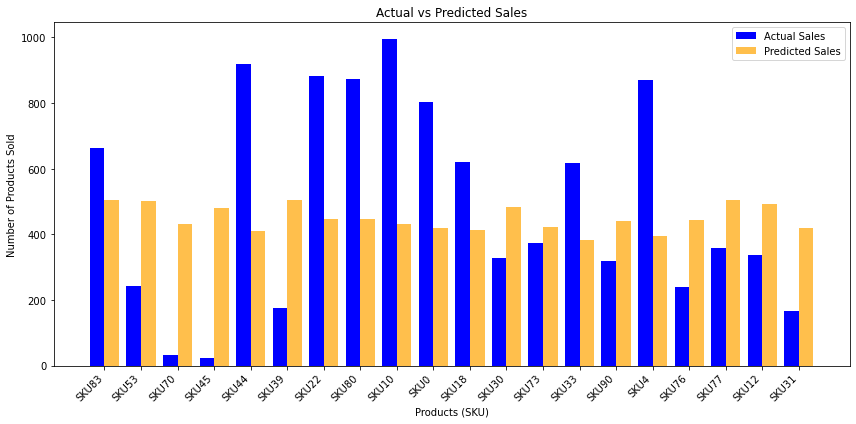

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset
df = pd.read_csv('D:\Data/supply_chain_data.csv')

# Selecting relevant columns for demand forecasting
X = df[['Price', 'Stock levels', 'Lead times', 'Order quantities']]  # Features
y = df['Number of products sold']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Output model performance
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("First 5 Predictions on test set:", y_pred[:5])

# Get real names for x-axis labels, e.g., SKUs or another identifying column
real_names = df.loc[y_test.index, 'SKU']  # Adjust to the column you want for labeling

# Visualizing Actual vs Predicted
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(y_test))

# Create bars for actual and predicted values
plt.bar(index, y_test, width=bar_width, label='Actual Sales', color='blue')
plt.bar(index + bar_width, y_pred, width=bar_width, label='Predicted Sales', alpha=0.7, color='orange')

# Setting the x-ticks to be the actual names
plt.xticks(index + bar_width / 2, real_names, rotation=45, ha='right')
plt.xlabel('Products (SKU)')  # Adjust label as needed
plt.ylabel('Number of Products Sold')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

                                                    Revenue Forecasting

Mean Squared Error: 8235652.513568573


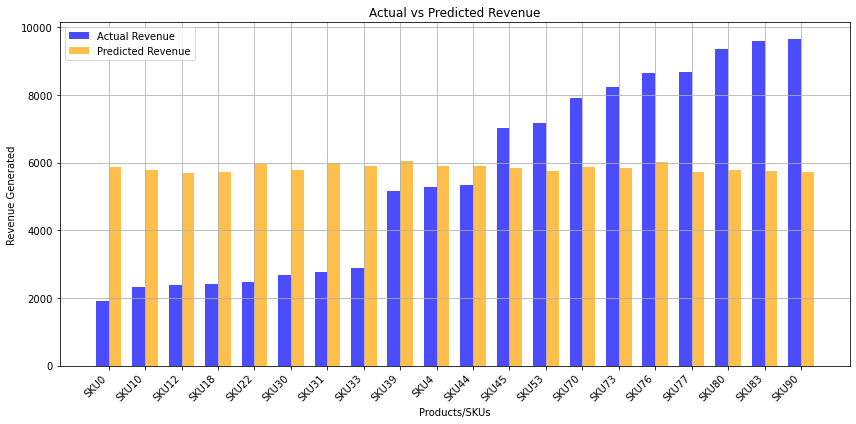

In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Loading the dataset
data = pd.read_csv('D:\Data/supply_chain_data.csv')

# Step 2: Selecting relevant features (X) and target (y)
X = data[['Price', 'Number of products sold']]  # Features influencing revenue
y = data['Revenue generated']  # Target variable we want to predict

# Step 3: Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Making predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluating the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 7: Prepare x-tick labels using real names
# Get the actual product or SKU names corresponding to the test set
real_names = data.loc[y_test.index, 'SKU']  # Replace 'SKU' with your actual column name

# Step 8: Plotting actual vs predicted revenue
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(y_test))

# Create bars for actual and predicted
plt.bar(index, y_test.sort_values().values, width=bar_width, label='Actual Revenue', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], y_pred[index], width=bar_width, label='Predicted Revenue', color='orange', alpha=0.7)

plt.title('Actual vs Predicted Revenue')
plt.xlabel('Products/SKUs')
plt.ylabel('Revenue Generated')

# Update x-ticks to use real names
plt.xticks([i + bar_width / 2 for i in index], real_names.sort_values().values, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


                                            Stock Level Forecasting

Mean Absolute Error: 22.749785875311474


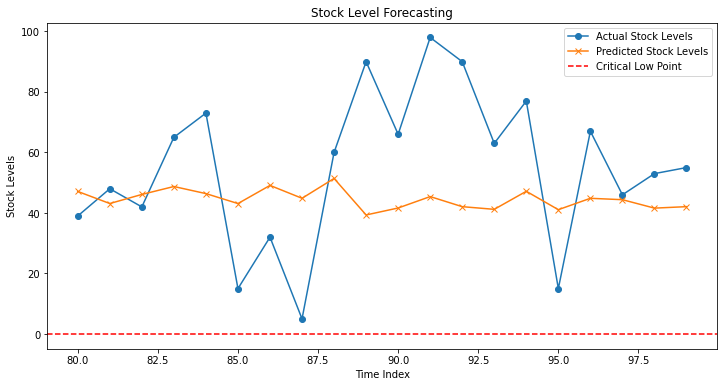

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('D:\\Data/supply_chain_data.csv')

# Feature Engineering: Create lagged features
data['Previous Stock Level'] = data['Stock levels'].shift(1)
data['Sales Lag'] = data['Number of products sold'].shift(1)

# Drop rows with NaN values after shifting
data.dropna(inplace=True)

# Define features and target
X = data[['Previous Stock Level', 'Sales Lag', 'Lead times']]
y = data['Stock levels']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast stock levels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize Actual vs Predicted Stock Levels
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Stock Levels', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Stock Levels', marker='x')
plt.title('Stock Level Forecasting')
plt.xlabel('Time Index')
plt.ylabel('Stock Levels')
plt.axhline(y=0, color='r', linestyle='--', label='Critical Low Point')  # Indicate critical low point
plt.legend()
plt.show()


Mean Squared Error: 917.7453661075788


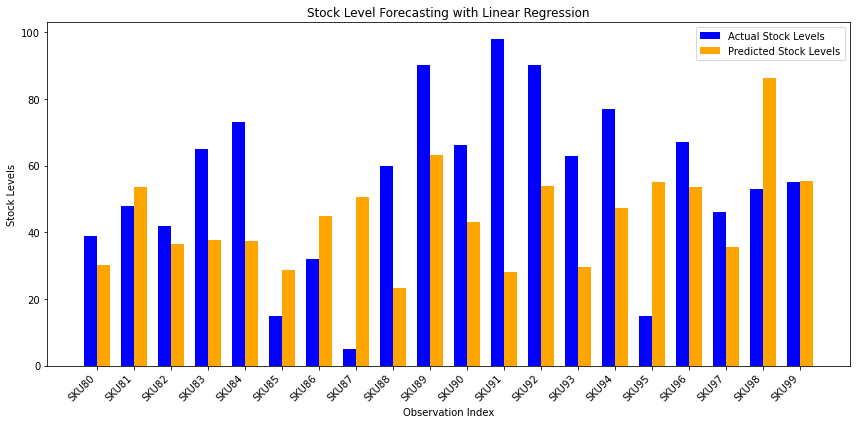

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('D:\\Data/supply_chain_data.csv')

# Prepare stock levels data
data.dropna(inplace=True)

# Feature Engineering: Create lagged features
data['Previous Stock Level'] = data['Stock levels'].shift(1)
data['Sales Lag'] = data['Number of products sold'].shift(1)
data['Lead Time'] = data['Lead times']
data['Sales Change'] = data['Number of products sold'].pct_change().fillna(0)  # Percentage change in sales

# Drop rows with NaN values after shifting
data.dropna(inplace=True)

# Define features and target
X = data[['Previous Stock Level', 'Sales Lag', 'Lead Time', 'Sales Change']]
y = data['Stock levels']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Forecast stock levels for the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a bar chart to visualize actual vs predicted stock levels
bar_width = 0.35  # Width of the bars
x = range(len(y_test))  # x-axis positions for the bars

plt.figure(figsize=(12, 6))
plt.bar([i for i in x], y_test, width=bar_width, label='Actual Stock Levels', color='blue', align='center')
plt.bar([i + bar_width for i in x], y_pred, width=bar_width, label='Predicted Stock Levels', color='orange', align='center')

plt.title('Stock Level Forecasting with Linear Regression')
plt.xlabel('Observation Index')
plt.ylabel('Stock Levels')

# Assuming you have product names or relevant labels for the x-axis
product_names = data['SKU'].iloc[-len(y_test):].values  # Adjust to get relevant product names for the test set

# Update x-ticks to use real names
plt.xticks([i + bar_width / 2 for i in x], product_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


                                    Shipping Time and Cost Forecasting

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')
Mean Absolute Error for Shipping Times: 1.8059362655278242


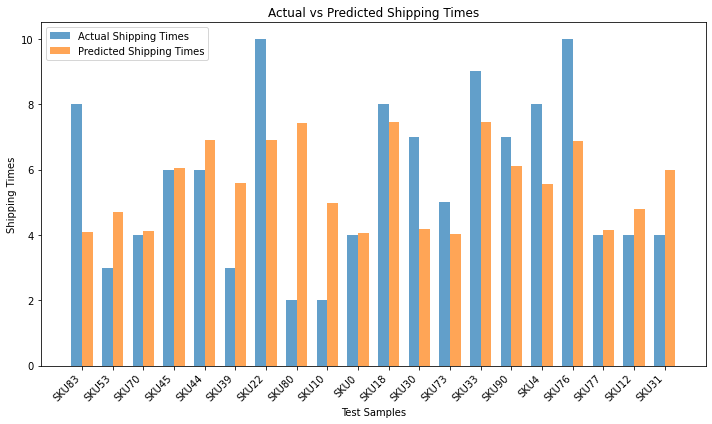

In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Loading the dataset
data = pd.read_csv('D:\\Data/supply_chain_data.csv')

# Print the column names to check
print(data.columns)  # Check the actual names of your columns

# Step 2: Selecting relevant features (X) for shipping times and costs
X_times = data[['Shipping costs', 'Shipping carriers', 'Transportation modes']]
y_times = data['Shipping times']

# Step 3: Encoding categorical variables (if needed)
X_times = pd.get_dummies(X_times, drop_first=True)

# Step 4: Splitting the data into training and testing sets (80% train, 20% test)
X_train_times, X_test_times, y_train_times, y_test_times = train_test_split(X_times, y_times, test_size=0.2, random_state=42)

# Step 5: Initializing and training the Linear Regression model for shipping times
model_times = LinearRegression()
model_times.fit(X_train_times, y_train_times)

# Step 6: Making predictions on the test data
y_pred_times = model_times.predict(X_test_times)

# Step 7: Evaluating the model performance using Mean Absolute Error (MAE)
mae_times = mean_absolute_error(y_test_times, y_pred_times)
print(f"Mean Absolute Error for Shipping Times: {mae_times}")

# Step 8: Plotting actual vs predicted shipping times
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of the bars
x = range(len(y_test_times))  # x-axis positions for the bars

# Create bars for actual and predicted
plt.bar(x, y_test_times, width=bar_width, label='Actual Shipping Times', alpha=0.7)
plt.bar([i + bar_width for i in x], y_pred_times, width=bar_width, label='Predicted Shipping Times', alpha=0.7)

plt.title('Actual vs Predicted Shipping Times')
plt.xlabel('Test Samples')
plt.ylabel('Shipping Times')

# Extract product names for the x-axis labels
product_names = data.loc[y_test_times.index, 'SKU']  # Replace 'SKU' with your actual product name column

# Update x-ticks to use real names
plt.xticks([i + bar_width / 2 for i in x], product_names.values, rotation=45, ha='right')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


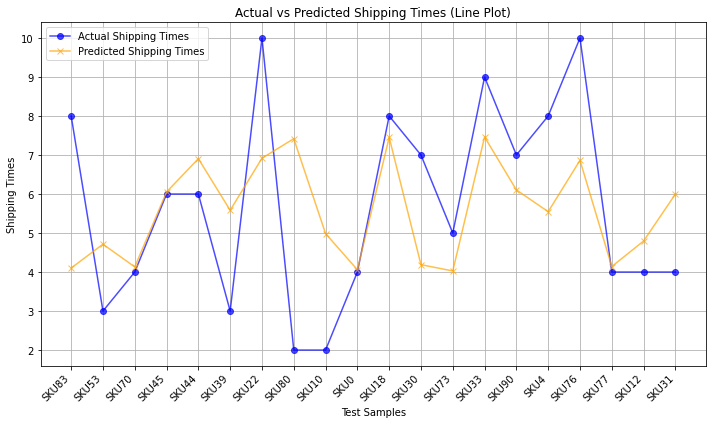

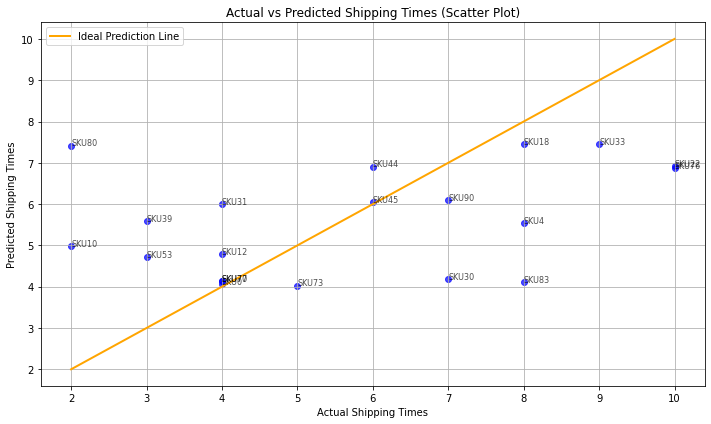

In [9]:
# Step 8: Plotting actual vs predicted shipping times using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_times)), y_test_times, marker='o', label='Actual Shipping Times', color='blue', alpha=0.7)
plt.plot(range(len(y_pred_times)), y_pred_times, marker='x', label='Predicted Shipping Times', color='orange', alpha=0.7)

plt.title('Actual vs Predicted Shipping Times (Line Plot)')
plt.xlabel('Test Samples')
plt.ylabel('Shipping Times')

# Extract product names for the x-axis labels
product_names = data.loc[y_test_times.index, 'SKU']  # Replace 'SKU' with your actual product name column

# Update x-ticks to use real names
plt.xticks(range(len(product_names)), product_names.values, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Step 9: Plotting actual vs predicted shipping times using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_times, y_pred_times, color='blue', alpha=0.7)
plt.plot([y_test_times.min(), y_test_times.max()], [y_test_times.min(), y_test_times.max()], color='orange', lw=2, label='Ideal Prediction Line')

plt.title('Actual vs Predicted Shipping Times (Scatter Plot)')
plt.xlabel('Actual Shipping Times')
plt.ylabel('Predicted Shipping Times')

# Annotate each point with the corresponding SKU
for i, txt in enumerate(product_names.values):
    plt.annotate(txt, (y_test_times.iloc[i], y_pred_times[i]), fontsize=8, alpha=0.7)

plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

                                        Order Quantity Forecasting

Mean Absolute Error for Order Quantity Forecasting: 26.17793236057783


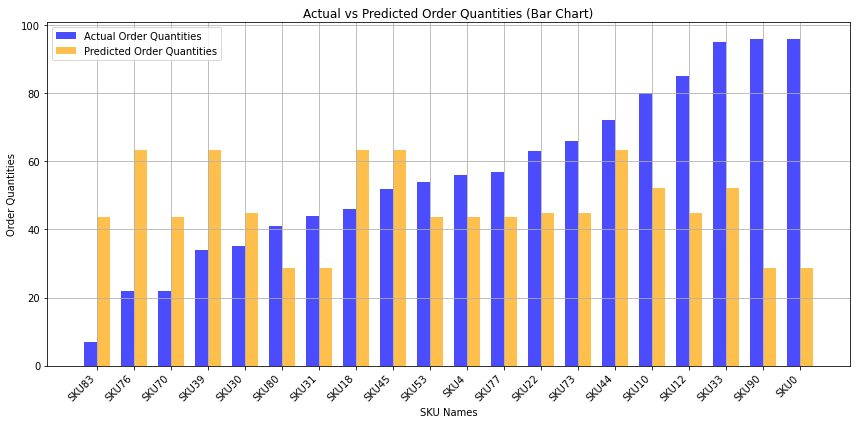

In [10]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Loading the dataset
data = pd.read_csv('D:\Data/supply_chain_data.csv')

# Step 2: Selecting relevant features for order quantity forecasting
X = data[['Supplier name', 'SKU']]  # Feature: Supplier Name and SKU
y = data['Order quantities']  # Target variable: Order quantities

# Step 3: Encoding categorical variables (if needed)
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Initializing and training the Linear Regression model for order quantities
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Making predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluating the model performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Order Quantity Forecasting: {mae}")

# Step 8: Plotting actual vs predicted order quantities using a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(y_test))

# Sorting y_test and getting corresponding SKU names
sorted_y_test = y_test.sort_values()
sorted_index = sorted_y_test.index
sku_names_test = data.loc[sorted_index, 'SKU']  # Replace 'SKU' with the actual column name for SKUs

# Sort the predictions to match the sorted order of y_test
sorted_y_pred = pd.Series(y_pred, index=y_test.index).loc[sorted_index]

# Create bars for actual and predicted
plt.bar(index, sorted_y_test.values, width=bar_width, label='Actual Order Quantities', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], sorted_y_pred.values, width=bar_width, label='Predicted Order Quantities', color='orange', alpha=0.7)

plt.title('Actual vs Predicted Order Quantities (Bar Chart)')
plt.xlabel('SKU Names')
plt.ylabel('Order Quantities')

# Update xticks with actual SKU names
plt.xticks([i + bar_width / 2 for i in index], sku_names_test, rotation=45, ha='right')

plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


                                        Defect Rate Forecasting

Mean Absolute Error for Defect Rate Forecasting: 1.055151655613282


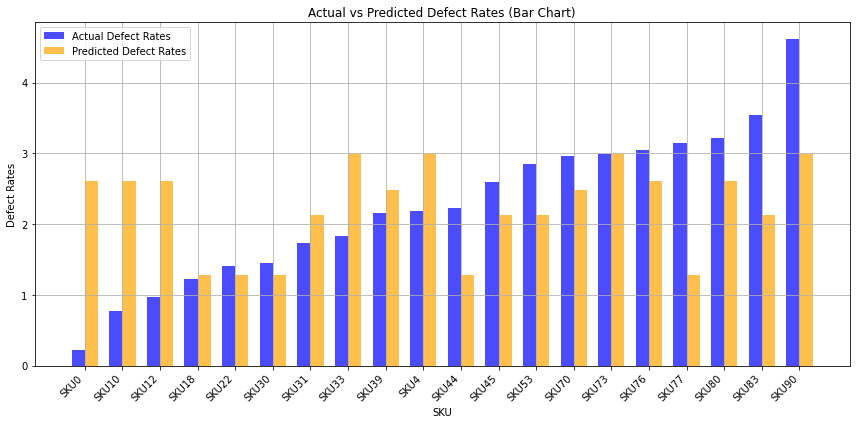

In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Loading the dataset
data = pd.read_csv('D:\Data/supply_chain_data.csv')

# Step 2: Selecting relevant features for defect rate forecasting
X = data[['Inspection results', 'Manufacturing costs', 'Supplier name']]  # Features
y = data['Defect rates']  # Target variable



# Step 4: Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Initializing and training the Linear Regression model for defect rates
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Making predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluating the model performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Defect Rate Forecasting: {mae}")

# Step 8: Plotting actual vs predicted defect rates using a bar chart with real names
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(y_test))

# Get real names for x-axis labels, e.g., SKUs
real_names = data.loc[y_test.index, 'SKU']  # Adjust this to the column you want for labeling

# Create bars for actual and predicted
plt.bar(index, y_test.sort_values().values, width=bar_width, label='Actual Defect Rates', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], y_pred[index], width=bar_width, label='Predicted Defect Rates', color='orange', alpha=0.7)

plt.title('Actual vs Predicted Defect Rates (Bar Chart)')
plt.xlabel('SKU')  # Adjust label as needed
plt.ylabel('Defect Rates')
plt.xticks([i + bar_width / 2 for i in index], real_names.sort_values().values, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


Mean Absolute Error for Defect Rate Forecasting: 0.8194855790626949


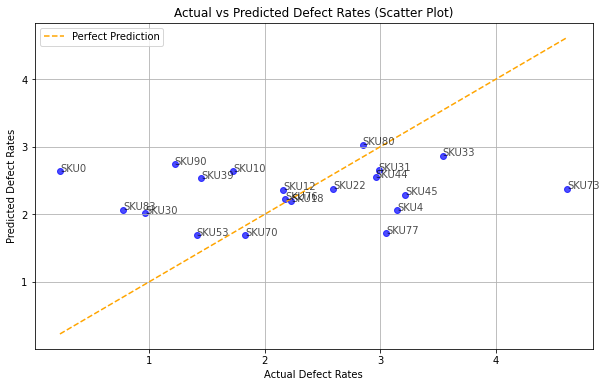

In [12]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Loading the dataset
data = pd.read_csv('D:\Data/supply_chain_data.csv')

# Step 2: Selecting relevant features for defect rate forecasting
X = data[['Inspection results', 'Manufacturing costs', 'Supplier name']]  # Features
y = data['Defect rates']  # Target variable

# Step 3: Encoding categorical variables (if needed)
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Initializing and training the Linear Regression model for defect rates
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Making predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluating the model performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Defect Rate Forecasting: {mae}")

# Step 8: Plotting actual vs predicted defect rates using a scatter plot with real names
plt.figure(figsize=(10, 6))

# Get the real names for x-axis labels, e.g., SKUs or another identifying column
real_names = data.loc[y_test.index, 'SKU']  # Adjust to the column you want for labeling

# Create a scatter plot for actual vs predicted defect rates
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)

# Adding text labels for each point
for i, txt in enumerate(real_names):
    plt.annotate(txt, (y_test.iloc[i], y_pred[i]), fontsize=10, alpha=0.7)

# Plotting the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Defect Rates (Scatter Plot)')
plt.xlabel('Actual Defect Rates')
plt.ylabel('Predicted Defect Rates')
plt.legend()
plt.grid()
plt.show()
